## Conway's Game of Life
In this notebook, you will implement the rules to Conway's Game of Life.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def randomGrid(N, prob):
    return np.random.choice([1, 0], N*N, p=[prob, 1-prob]).reshape(N, N)

Use the below code to impleme

In [3]:
def update(frameNum, img, grid, N):
    N = grid.shape[0]
    newGrid = grid.copy()
    
    #####################################################################################
    
    # TODO: code the rules of Conway GOL for each cell of the N by N grid.
    # Feel free to use whatever padding (zero padding, toroidal, etc) you wish.
    
    
    #####################################################################################
    
    img.set_data(newGrid*255)
    grid[:] = newGrid[:]
    return img

## Gliders
The below code defines gliders, the most simple known spaceship in the GoL.

In [4]:
def addGlider(i, j, grid):
    glider = np.array([[0, 0, 1],
                       [1, 0, 1],
                       [0, 1, 1]])
    grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):
 
    """adds a Gosper Glider Gun with top left
       cell at (i, j)"""
    gun = np.zeros(11*38).reshape(11, 38)
 
    gun[5][1] = gun[5][2] = 1
    gun[6][1] = gun[6][2] = 1
 
    gun[3][13] = gun[3][14] = 1
    gun[4][12] = gun[4][16] = 1
    gun[5][11] = gun[5][17] = 1
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 1
    gun[7][11] = gun[7][17] = 1
    gun[8][12] = gun[8][16] = 1
    gun[9][13] = gun[9][14] = 1
 
    gun[1][25] = 1
    gun[2][23] = gun[2][25] = 1
    gun[3][21] = gun[3][22] = 1
    gun[4][21] = gun[4][22] = 1
    gun[5][21] = gun[5][22] = 1
    gun[6][23] = gun[6][25] = 1
    gun[7][25] = 1
 
    gun[3][35] = gun[3][36] = 1
    gun[4][35] = gun[4][36] = 1
 
    grid[i:i+11, j:j+38] = gun

<Figure size 720x720 with 0 Axes>

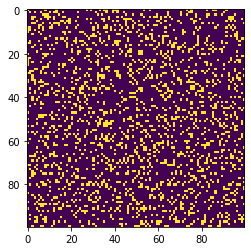

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
#####################################################################################

# Variables - feel free to change these!

N = 100
prob = 0.2
mov_file ='conway_GoL.gif'
n_steps = 100
updateInterval = 50

#####################################################################################

# Change these to add gliders and gospers into your 

glider = False
gosper = False

#####################################################################################

# declare grid
grid = np.zeros((N, N))

if glider:
    addGlider(1, 1, grid)
elif gosper:
    addGosperGliderGun(10, 10, grid)
else:
    grid = randomGrid(N, prob)
    
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

img = ax.imshow(grid, interpolation='nearest')
plt.show()
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                              frames = 100,
                              interval=updateInterval,
                              save_count=50)

ani.save(mov_file, fps=10)